In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("data_science_job.csv")
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
6027,11147,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,Humanities,4.0,100-500,Pvt Ltd,114.0,0.0
8828,33317,city_61,0.913,Male,No relevent experience,no_enrollment,High School,NaN,2.0,NaN,NaN,258.0,0.0
2396,28153,city_46,0.762,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,NaN,13.0,0.0
5596,21597,city_157,0.769,Male,Has relevent experience,no_enrollment,Masters,No Major,9.0,NaN,NaN,50.0,0.0
17250,21299,city_103,0.920,Male,Has relevent experience,Full time course,Graduate,STEM,12.0,10000+,Pvt Ltd,11.0,0.0


In [6]:
df.isnull().mean()*100 # Missing Data

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

We cannot apply CCA in gender, major_discipline, company size and company type because a lot of rows will be removed.

In [8]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols # We will apply CCA in these columns

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [ ]:
len(df[cols].dropna()) / len(df) # 89% data still remains after CCA

0.8968577095730244

In [14]:
new_df = df[cols].dropna()
new_df

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
4,0.767,no_enrollment,Masters,20.0,8.0
5,0.764,Part time course,Graduate,11.0,24.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


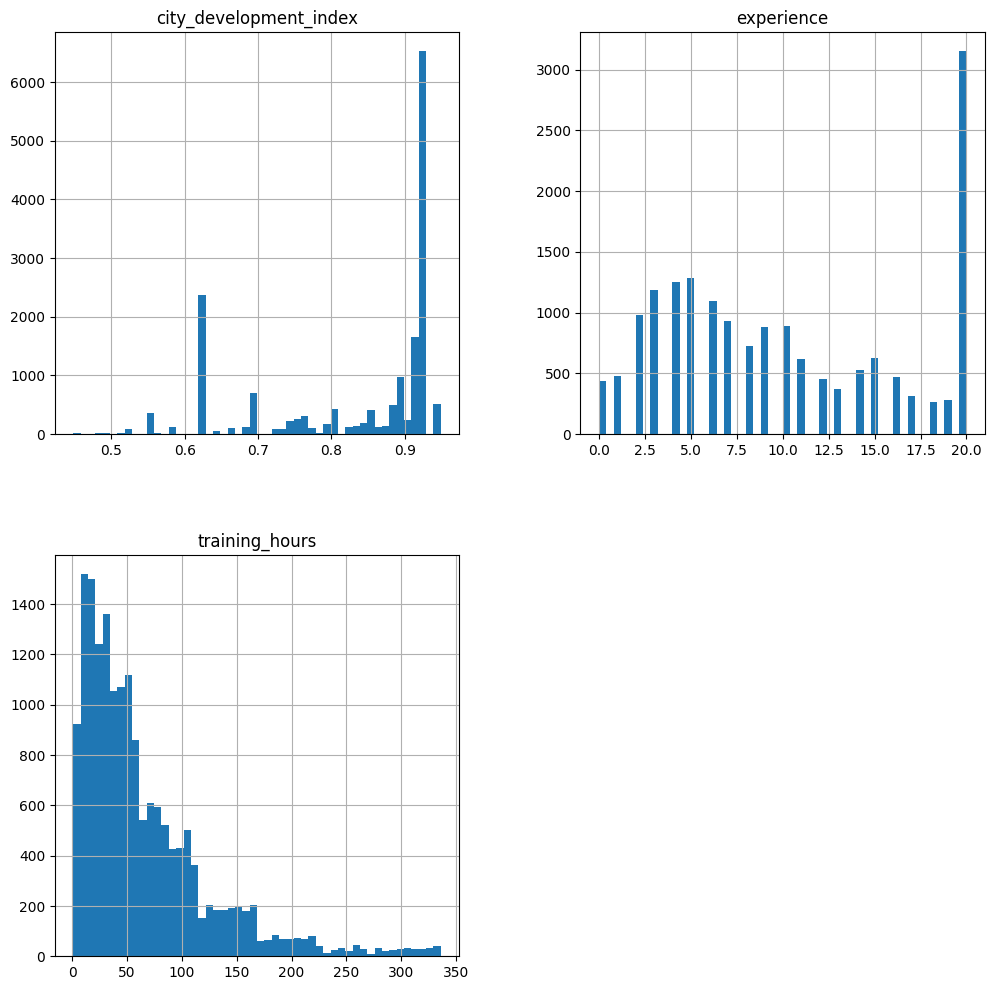

In [15]:
new_df.hist(bins=50, figsize=(12, 12))
plt.show()

### Comparing Data of experience before and after applying CCA

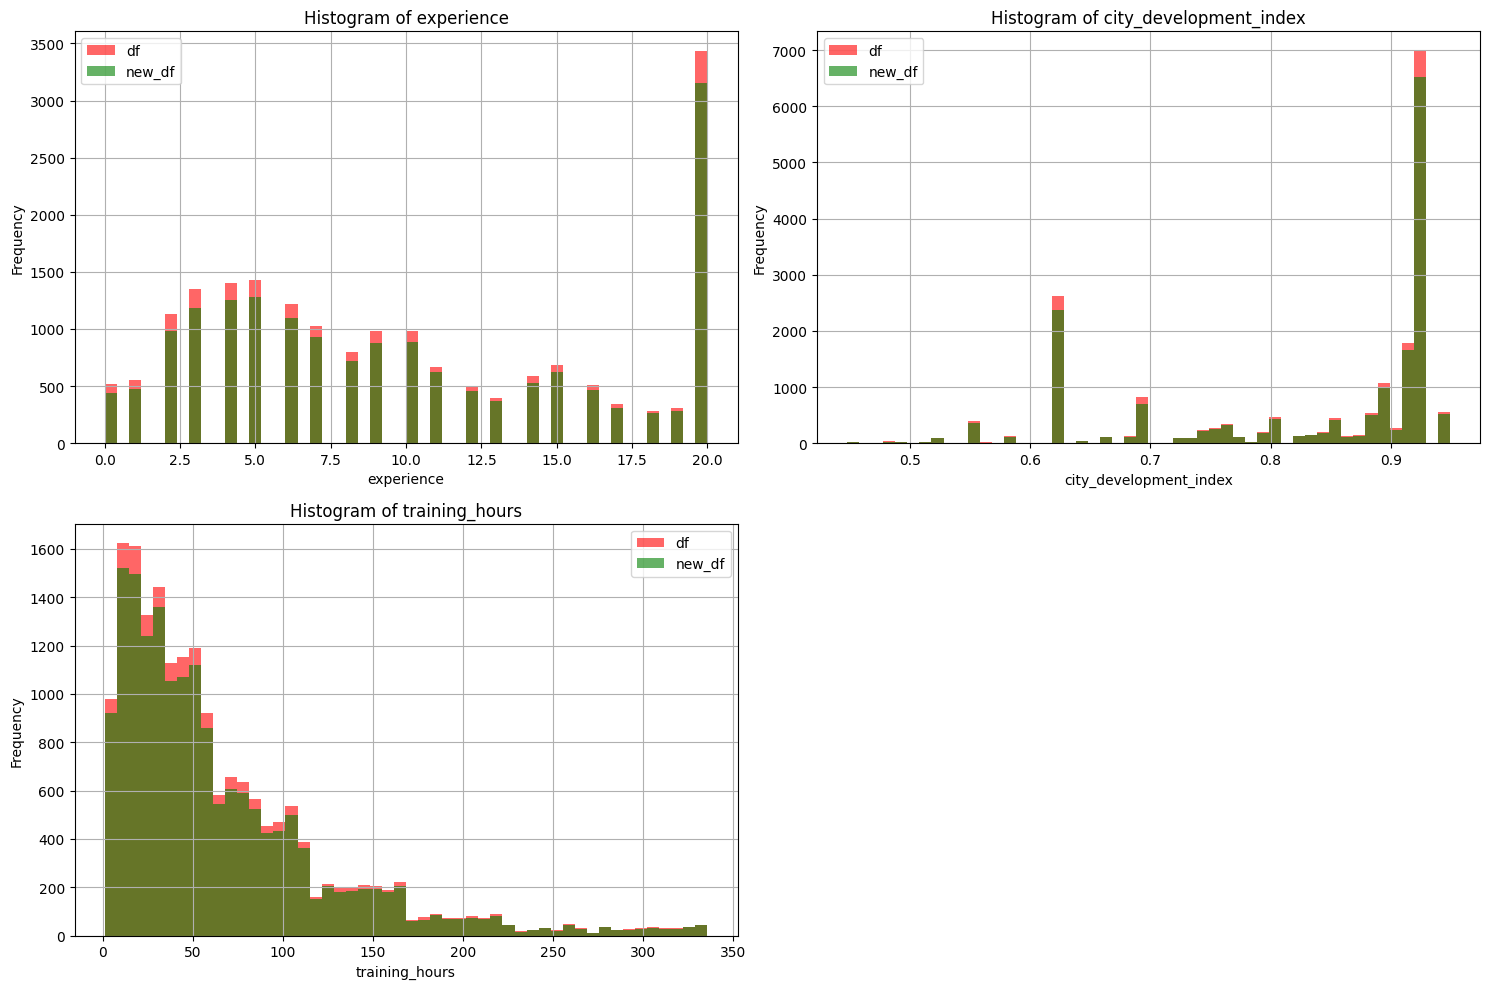

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10)) 

columns = ['experience', 'city_development_index', 'training_hours'] 

for i, col in enumerate(columns):
    row, col_idx = divmod(i, 2) 
    ax = axes[row, col_idx]
    df[col].hist(bins=50, ax=ax, color='red', alpha=0.6, label='df')
    new_df[col].hist(bins=50, ax=ax, color='green', alpha=0.6, label='new_df')
    ax.set_title(f"Histogram of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax.legend()

if len(columns) < 4:
    fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()


/Users/bibekjoshi01/Drive X/my-projects/ai-ml-journey/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/Users/bibekjoshi01/Drive X/my-projects/ai-ml-journey/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj())
/Users/bibekjoshi01/Drive X/my-projects/ai-ml-journey/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: invalid value encountered in dot
  c = dot(X, X_T.conj())
/Users/bibekjoshi01/Drive X/my-projects/ai-ml-journey/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/Users/bibekjoshi01/Drive X/my-projects/ai-ml-journey/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj()

<Axes: ylabel='Density'>

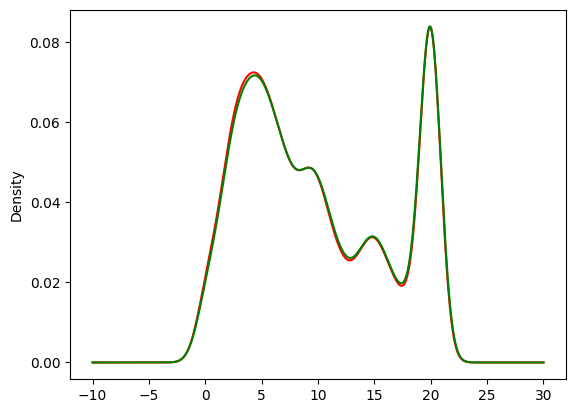

In [24]:
fig = plt.figure()

ax2 = fig.add_subplot(111)

df['experience'].plot.density(ax=ax2, color='red')
new_df['experience'].plot.density(ax=ax2, color='green')

### Comparing after and before ratio for categorical column

In [37]:
new_df['education_level'].value_counts()

education_level
Graduate          10650
Masters            4022
High School        1845
Phd                 380
Primary School      285
Name: count, dtype: int64

In [43]:
temp = pd.concat([
    df['education_level'].value_counts() / len(df),
    new_df['education_level'].value_counts() / len(new_df),
], axis=1)
temp.columns = ['Original', 'After CCA']
temp

,Original,After CCA
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


<Axes: ylabel='Density'>

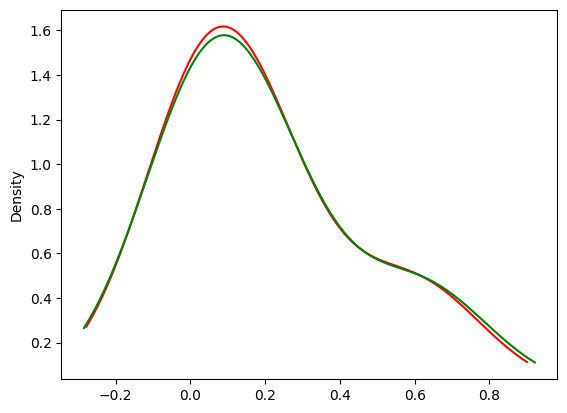

In [44]:
fig = plt.figure()

ax2 = fig.add_subplot(111)

temp['Original'].plot.density(ax=ax2, color='red')
temp['After CCA'].plot.density(ax=ax2, color='green')